# Постобработка

In [1]:
import pandas as pd

dinis_df = pd.read_csv('/content/drive/MyDrive/nlp/Динислам.csv', sep=None)
my_df = pd.read_csv('/content/drive/MyDrive/nlp/моя часть.csv', sep=None)
olya_df = pd.read_csv('/content/drive/MyDrive/nlp/Оля.csv', sep=None)

dinis_df.insert(10, 'Лишнее', False)
olya_df.insert(10, 'Лишнее', False)

<ipython-input-1-51a195d716cc>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  dinis_df = pd.read_csv('/content/drive/MyDrive/nlp/Динислам.csv', sep=None)
<ipython-input-1-51a195d716cc>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  my_df = pd.read_csv('/content/drive/MyDrive/nlp/моя часть.csv', sep=None)
<ipython-input-1-51a195d716cc>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  olya_df = pd.read_csv('/content/drive/MyDrive/nlp/Оля.csv', sep=None)


In [2]:
dinis_df.drop(1, inplace=True)
olya_df.drop([0, 1], inplace=True)

In [3]:
merged_df = pd.concat([my_df, dinis_df, olya_df], axis = 0, ignore_index=True)

In [4]:
merged_df.shape

(2386, 15)

In [5]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/nlp/моя часть.csv', sep='/t')

merged_df.fillna(False, inplace=True)

drop_columns = ['annotation_id','annotator','created_at','lead_time','updated_at']
merged_df = merged_df.drop(columns=drop_columns)

def sentiment_proceed(index, df):
  import json

  row = df['sentiment'].values[index]
  try:
    sen_dict =  json.loads(row)
    choices = sen_dict['choices']
  except json.JSONDecodeError:
    choices = [row]
  return choices

for index, row in merged_df.iterrows():
  value_to_fill = sentiment_proceed(index, merged_df)
  for value in value_to_fill:
    merged_df.loc[index, value] = True

<ipython-input-5-c1a6e8d33a79>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df.fillna(False, inplace=True)
<ipython-input-5-c1a6e8d33a79>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.fillna(False, inplace=True)


In [6]:
merged_df.head()

,comment,id,rating,sentiment,Вопрос решен,Лишнее,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,спасибо,2945792,5,Понравилось выполнение заявки,False,False,False,False,False,True
1,спасибо!,3234340,5,Понравилось выполнение заявки,False,False,False,False,False,True
2,Отлично,3380332,5,Понравилось выполнение заявки,False,False,False,False,False,True
3,Благодарю за оперативное решение проблемы !,3381812,5,"{""choices"":[""Нравится скорость отработки заяво...",True,False,False,False,True,False
4,Прекрасный специалист! Побольше таких,3461991,5,Нравится качество работы сотрудников,False,False,False,True,False,False


In [7]:
merged_df = merged_df.drop(columns='sentiment')

In [8]:
int_categories = (merged_df.iloc[0::, 3::]).astype(int)
merged_df = pd.concat([merged_df.iloc[0::, 0:3], int_categories], axis=1)


In [9]:
merged_df.drop_duplicates(inplace=True)

In [11]:
merged_df.to_csv('/content/drive/MyDrive/nlp/самая общая постобработка.csv')

# Баланс классов

In [12]:
model_df = pd.read_csv('/content/drive/MyDrive/nlp/самая общая постобработка.csv')
model_df.head()

,Unnamed: 0,comment,id,rating,Вопрос решен,Лишнее,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки
0,0,спасибо,2945792,5,0,0,0,0,0,1
1,1,спасибо!,3234340,5,0,0,0,0,0,1
2,2,Отлично,3380332,5,0,0,0,0,0,1
3,3,Благодарю за оперативное решение проблемы !,3381812,5,1,0,0,0,1,0
4,4,Прекрасный специалист! Побольше таких,3461991,5,0,0,0,1,0,0


In [13]:
model_df = model_df.drop(columns='Unnamed: 0')

In [14]:
marks_column = model_df.iloc[0::, 3::].columns

class_balance = pd.DataFrame({
    'marks' : [column for column in model_df.iloc[0::, 3::].columns],
    'count' : [((model_df[column] == 1).sum()) for column in model_df.iloc[0::, 3::].columns]
})

In [15]:
class_balance

,marks,count
0,Вопрос решен,952
1,Лишнее,269
2,Нравится качество выполнения заявки,222
3,Нравится качество работы сотрудников,368
4,Нравится скорость отработки заявок,805
5,Понравилось выполнение заявки,771


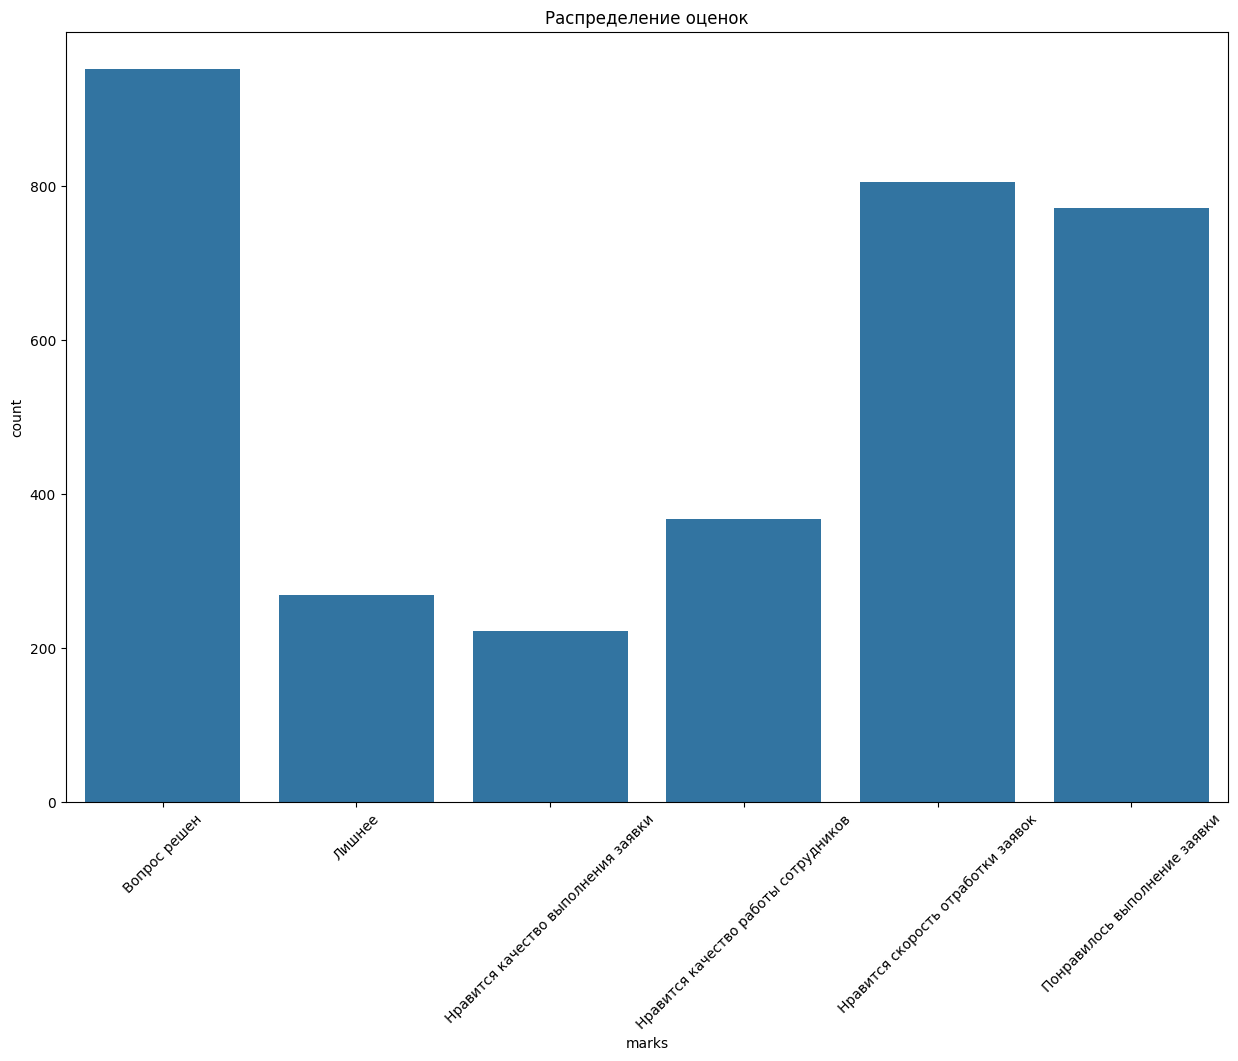

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.barplot(x='marks', y='count', data=class_balance, width=0.8)
plt.title('Распределение оценок')
plt.xticks(rotation=45)
plt.show()

# Статистика

**1. Облако слов**


Облако слов по всем комментариям.

по каждой категории отдельно

https://www.kaggle.com/code/anandhuh/word-cloud-in-python-for-beginners

**2. Корреляция между категориями**

 например, часто ли встречаются вместе «Вопрос решен» и «Нравится скорость отработки заявок».

**3. Длина комментариев**


Среднюю и медианную длину комментариев (в словах или символах).

Построить гистограмму распределения длины.

Опционально: сравнить длину по категориям.

**4. Среднее количество категорий на комментарий**

Посчитать, сколько меток (True) ставится на один комментарий в среднем.

Построить гистограмму распределения меток по комментам.

# Модель и настройка весов

In [ ]:
https://habr.com/ru/articles/704592/
